# Exploring AirBnb In Athens

First, we import the necessary libraries and read the data. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will primarily use the listings.csv file, which contains information about the listings in Athens.

In [2]:
listings = pd.read_csv('../data/listings.csv')

Lets perform a quick check to examine the available columns

In [140]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

And another one to get a sample of the data, we will use the sample() function for this purpose and select 5 random rows.

In [142]:
listings.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
9579,772400406203655456,Rental unit in Athina · ★4.71 · 1 bedroom · 1 ...,20115840,Mirka,NaN,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,37.986025,23.740484,Entire home/apt,42,2,17,2023-09-13,2.51,1,314,17,01176694160
8453,658659694044821149,Rental unit in Athina · ★4.0 · 1 bedroom · 1 b...,40921063,Gerhard,NaN,ΠΑΤΗΣΙΑ,38.010020,23.736840,Private room,16,3,3,2023-02-25,0.24,33,324,2,00001628488
7953,619963176661071970,Loft in Athina · ★4.86 · 2 bedrooms · 2 beds ·...,457555537,Christina,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.979890,23.724830,Entire home/apt,120,2,76,2023-09-11,4.61,1,224,46,00001525550
9311,747160186597268965,Condo in Athina · ★4.50 · 1 bedroom · 1 bed · ...,90390850,Evan&Anetta,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.983832,23.756194,Entire home/apt,65,1,28,2023-09-02,2.82,78,157,28,00001814004
4177,35178793,Loft in Athina · ★4.91 · 1 bedroom · 1 bed · 1...,147148054,Giannis,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.965320,23.731800,Entire home/apt,213,1,384,2023-09-16,7.66,11,335,91,00000695883


# Listings Per Neighbourhood

Lets see how many listings are available per neighbourhood. We will use the ```value_counts()``` function on the neighbourhoods column for that.
<br>
We ensure that the results are sorted in descending popularity order by using the ```sort_values()``` function.

In [143]:
listings_per_neighbourhood = listings['neighbourhood'].value_counts().sort_values(ascending=False)

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
ΠΕ

By far the most popular area for listings seems to be the commercial triangle of Athens witch is defined as the central area of the Municipality of Athens enclosed by the road axes of Stadiou, Mitropoleos and Athena street. This is the area where most of the tourist attractions are located, so it makes sense that it is the most popular area for listings.

# Neighbourhood Prices in Descending Order

Lets extract some metrics about neighbourhood prices. We will use the ```groupby()``` function to group the listings by neighbourhood and then perform aggregations on the price column. We will use the ```mean``` function of numpy to get the average price per neighbourhood, the ```mean``` function to get the mean price and the ```std``` and ```size``` to get the standard deviation and count of listings accordingly. We will also sort the results in descending order by median price.


In [5]:
listings_grouped_by_neighbourhood = listings.groupby('neighbourhood')
neighbourhood_prices = listings_grouped_by_neighbourhood['price'].agg([np.median, np.mean, np.std, np.size])
neighbourhood_prices = neighbourhood_prices.sort_values(by='median', ascending=False)
print(neighbourhood_prices)

                                  median        mean          std  size
neighbourhood                                                          
ΡΗΓΙΛΛΗΣ                           120.0  367.800000   578.622675     5
ΖΑΠΠΕΙΟ                            114.0  224.068323   641.163173   161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ             104.0  140.650662   229.183015  2416
ΑΚΡΟΠΟΛΗ                           100.0  195.344560   703.321565   386
ΚΟΛΩΝΑΚΙ                           100.0  128.595294   104.431349   425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 90.5  120.284314   104.613533  1122
ΘΗΣΕΙΟ                              90.0  126.492228   124.176775   386
ΚΕΡΑΜΕΙΚΟΣ                          89.0  123.883382   136.367487   343
ΛΥΚΑΒΗΤΤΟΣ                          75.0  104.561728    87.859850   162
ΓΚΑΖΙ                               70.5   95.792453    75.355882   106
ΣΤΑΔΙΟ                              70.0  121.515873   509.991840   252
ΙΛΙΣΙΑ                              70.0   87.189815    53.51901

Despite the fact that the commercial triangle is the most popular area for listings, it is not the most expensive one. The most expensive neighbourhood by median price is Riglis Street.

## Availability per Day

Lets see how many listings are available per day. We will use the calendar dataset for this purpose.
<br>
We load the dataset and take a quick look at the structure of the data.

In [40]:
calendar = pd.read_csv('../data/calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2023-09-21,f,$150.00,$60.00,1,180
1,10595,2023-09-22,t,$150.00,$60.00,1,180
2,10595,2023-09-23,t,$150.00,$75.00,1,180
3,10595,2023-09-24,t,$150.00,$90.00,1,180
4,10595,2023-09-25,f,$300.00,$210.00,1,180


We observe that availability is marked as a binary value, indicated by the t and f values.
<br>
We will filter for values that are equal to t and then group by date and count the number of listings available per day.
<br>
Replacing the t and f values with 1 and 0 respectively, would also be a good strategy, but considering that we are only interested in the number of listings available per day, it is not necessary.

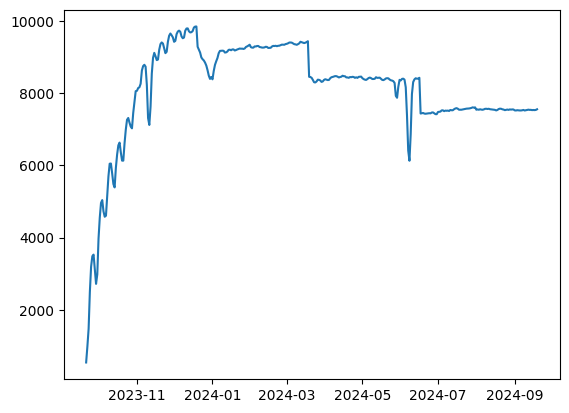

In [46]:
# Create a plot with the number of listings available per day, on the y axis, and the date, on the x axis.
x = calendar['date'].unique()
y = calendar[calendar['available'] == 't'].groupby('date').size()
_ = plt.plot(x,y)

As we can see, considering we are looking of a snapshot of all listings from a particular day in the past, the larger the timeframe the more chances of finding an available listing. This is up to the point of around 6 months where uncertanty of the hosts about their availability starts to increase so the available listings are becoming more and more scarce.  

## Reviews, Occupacy per Listing, Average Income


Let's see some facts about airbnb listings. First we will create a histogram to see the distribution of the number of reviews per listing. We will use the ```hist()``` function for this purpose.

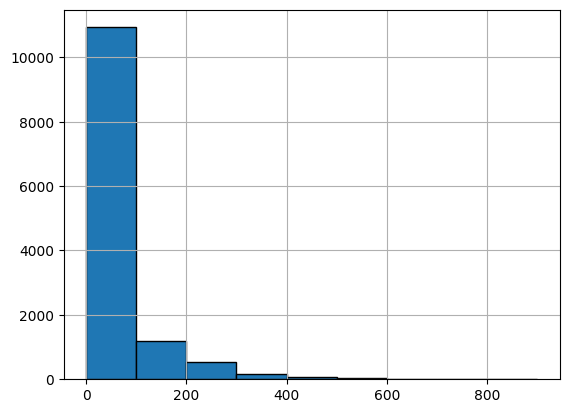

In [156]:
listing_reviews = listings['number_of_reviews']
_ = listing_reviews.hist(bins=np.arange(min(listing_reviews), max(listing_reviews) + 100, 100), edgecolor='black')

The vast majority of listings have less than 100 reviews. This indicates that most of listings are relatively new with the exception of some seasoned listing outliers reaching up to 600 reviews. We can also get an indicator that Airbnb is not actualy a popular choice for tourists in Athens assuming reviews are a sign of occupancy.

But how much do airbnb hosts earn? Lets try to find out. For that we are going to make some assumptions. First, we will assume that the number of reviews is a good indicator of occupancy. Second, we will assume that the average occupancy per listing per month is double the reviews per month. Third, we will assume that the average price per night is the global average price of the dataset and finally we will assume that each booking is for three nights stay. With these assumptions we can calculate the average income per listing per month.

In [73]:
avg_reviews_per_month = listings['reviews_per_month'].mean()
avg_occupacy_per_month = avg_reviews_per_month * 2
avg_price = listings['price'].mean()
avg_income_per_month = avg_occupacy_per_month * avg_price * 3
print(avg_income_per_month)


1190.1502553966434


In [78]:
# Show the number of listings per room type, in absolute numbers,
#  and also in percentages (the percentage of listings for each particular room type).
# Then, show the number of listings per neighrbourhood and room type.

listings_per_room_type_abs = listings['room_type'].value_counts()
print(listings_per_room_type_abs)


room_type
Entire home/apt    11652
Private room        1113
Hotel room           105
Shared room           85
Name: count, dtype: int64


In [79]:
listings_per_room_type_perc = listings['room_type'].value_counts(normalize=True)
print(listings_per_room_type_perc)

room_type
Entire home/apt    0.899421
Private room       0.085913
Hotel room         0.008105
Shared room        0.006561
Name: proportion, dtype: float64


In [83]:
listings_per_neighbourhood_and_room_type = listings.groupby(['neighbourhood', 'room_type']).size()

neighbourhood                     room_type      
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                    Entire home/apt     55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                  Entire home/apt     33
                                  Private room         5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ  Entire home/apt    686
                                  Hotel room           4
                                                    ... 
ΣΤΑΔΙΟ                            Private room        11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                   Entire home/apt     73
                                  Hotel room           4
                                  Private room         4
                                  Shared room          4
Length: 111, dtype: int64

<Axes: xlabel='last_review'>

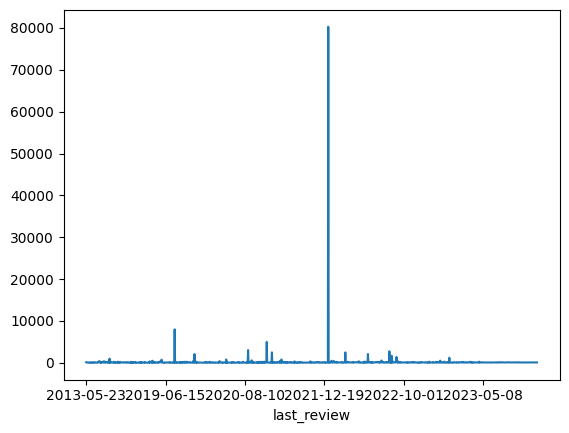

In [108]:
# Create a table with the average price per listing per day. Draw a graph visualizing the table.
# Needs work
average_price_per_day = listings.groupby('last_review')['price'].mean()
average_price_per_day.plot()

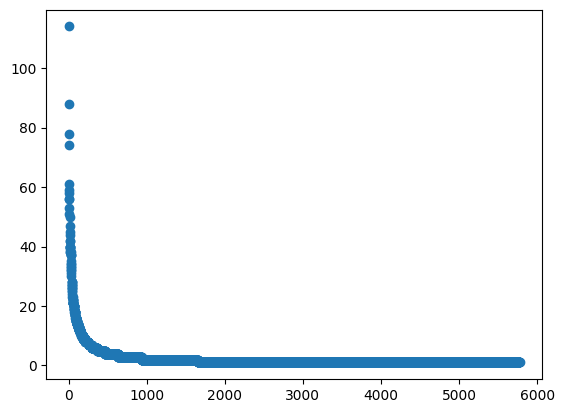

In [119]:
# Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

# * You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

# * On the $y$ axis you will have the number of listings.

# That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

host_listings_sorted = listings['host_id'].value_counts().sort_values(ascending=False)
x = np.arange(1, len(host_listings_sorted) + 1)
y = host_listings_sorted.values
_ = plt.scatter(x, y)

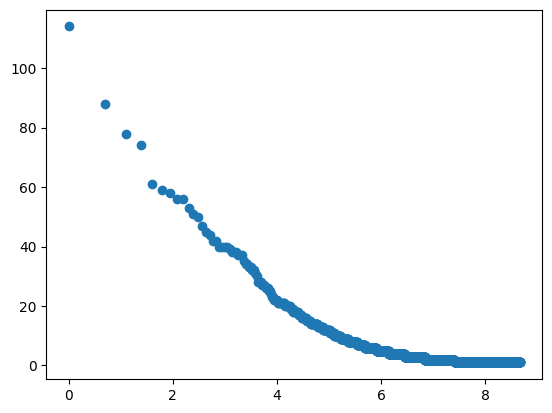

In [120]:
# After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.
x = np.arange(1, len(host_listings_sorted) + 1)
x = np.log(x)
y = host_listings_sorted.values
_ = plt.scatter(x, y)

In [122]:
import folium as fl

In [139]:

ath_map = fl.Map(location=[37.98863, 23.76527], zoom_start=12, max_zoom=15)
listings_head = listings.head(100)
#Loop through each row in the dataframe
for i,row in listings_head.iterrows():

    html = f"""<h3>{row['name']}</h3>

    <div>
        <p><strong>Host:</strong>{row['host_name']}</p>
        <p><strong>Neighbourhood:</strong> {row['neighbourhood']}</p>
        <p><strong>Room Type:</strong> {row['room_type']}</p>
        <p><strong>Price:</strong> {row['price']} €</p>
        <p><strong>Minimum Nights:</strong> {row['minimum_nights']}</p>
        <p><strong>Number of Reviews:</strong> {row['number_of_reviews']}</p>
    </div>
    """
    #Setup the content of the popup
    iframe = fl.IFrame(html=html)
    
    #Initialise the popup using the iframe
    popup = fl.Popup(iframe, min_width=300, max_width=300)
    
    #Add each row to the map
    fl.Marker(location=[row['latitude'],row['longitude']],
                  popup = popup).add_to(ath_map)

ath_map.save('index.html')